## Importação de Bibliotecas necessárias para a Análise dos Datasets

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

## Importação e Leitura dos Datasets

In [11]:
wwe_lutadores = pd.read_csv('tabela_lutadores.csv')

In [12]:
wwe_lutadores.head()

,ID_SUPERSTARS,SUPERSTARS,WEIGHT,HEIGHT,NATIONALITY,BIRTHDAY
0,1,Undertaker,136,208,"Houston, Texas, USA",1965-03-24
1,2,John Cena,114,185,"West Newbury, Massachusetts, USA",1977-04-23
2,3,Shawn Michaels,103,185,"Chandler, Arizona, USA",1965-07-22
3,4,AJ Styles,99,180,"Jacksonville, North Carolina, USA",1977-06-02
4,5,Randy Orton,110,193,"Knoxville, Tennessee, USA",1980-04-01


## Distribuição de frequências para a variável 'WEIGHT' e 'HEIGTH' (classes de amplitude fixa)

In [13]:
n = wwe_lutadores.shape[0] #Para encontrar o numero registros no dataset
k = 1 + (10/3) * np.log10 (n) #Mostra quantas classes seria favorável aplicar de acordo com o numero de registros que há 
k = int(k.round(0))
k 

9

## Tabela de Distribuição de Frequência e Porcentagem

In [14]:
frequencia_peso = pd.value_counts(  #Criar tabela de frequencia dos Pesos
    pd.cut(
        x = wwe_lutadores.WEIGHT,
        bins = 9,
        include_lowest= True),
    sort = False
    )

percentual_peso = pd.value_counts(  #Criar tabela de Percentual dos pesos
    pd.cut(
        x = wwe_lutadores.WEIGHT,
        bins = 9,
        include_lowest= True),
    sort = False,
    normalize=True
    ) *100

tabela_freq_perc_peso = pd.DataFrame(
    {'Frequência Weigth': frequencia_peso, 'Porcentagem Weigth (%)':percentual_peso}
)
tabela_freq_perc_peso

,Frequência Weigth,Porcentagem Weigth (%)
"(-0.183, 20.222]",11,5.5
"(20.222, 40.444]",0,0.0
"(40.444, 60.667]",23,11.5
"(60.667, 80.889]",36,18.0
"(80.889, 101.111]",52,26.0
"(101.111, 121.333]",58,29.0
"(121.333, 141.556]",14,7.0
"(141.556, 161.778]",5,2.5
"(161.778, 182.0]",1,0.5


In [15]:
frequencia_altura = pd.value_counts(  #Criar tabela de frequencia dos Pesos
    pd.cut(
        x = wwe_lutadores.HEIGHT,
        bins = 9,
        include_lowest= True),
    sort = False
    )

percentual_altura = pd.value_counts(  #Criar tabela de Percentual dos pesos
    pd.cut(
        x = wwe_lutadores.HEIGHT,
        bins = 9,
        include_lowest= True),
    sort = False,
    normalize=True
    ) *100

tabela_freq_perc_altura = pd.DataFrame(
    {'Frequência Heigth': frequencia_altura, 'Porcentagem Heigth (%)':percentual_altura}
)
tabela_freq_perc_altura

,Frequência Heigth,Porcentagem Heigth (%)
"(-0.222, 24.556]",7,3.5
"(24.556, 49.111]",0,0.0
"(49.111, 73.667]",0,0.0
"(73.667, 98.222]",0,0.0
"(98.222, 122.778]",0,0.0
"(122.778, 147.333]",0,0.0
"(147.333, 171.889]",49,24.5
"(171.889, 196.444]",131,65.5
"(196.444, 221.0]",13,6.5


## Criação de Histograma de Distribuição de Frequência

<AxesSubplot: title={'center': 'Distribuição de Frequência de Peso dos Lutadores'}, xlabel='Peso', ylabel='Density'>

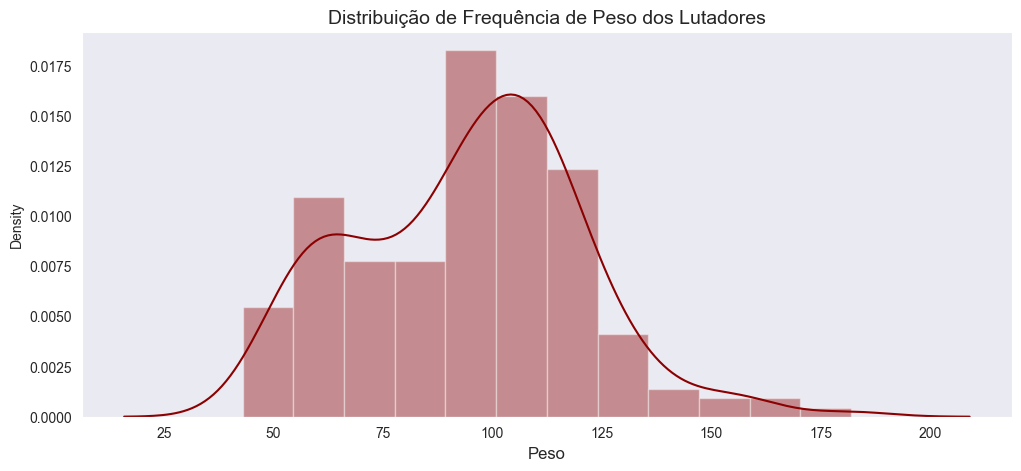

In [16]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Ignorar UserWarning

sns.set_style('dark')
ax = sns.distplot(wwe_lutadores.query('WEIGHT > 0').WEIGHT, color='darkred') #extrair apenas valores de peso acima de 0
ax.figure.set_size_inches(12,5)
ax.set_title('Distribuição de Frequência de Peso dos Lutadores', fontsize=14)
ax.set_xlabel('Peso', fontsize = 12)
ax

<AxesSubplot: title={'center': 'Distribuição de Frequência de Altura dos Lutadores'}, xlabel='Altura', ylabel='Density'>

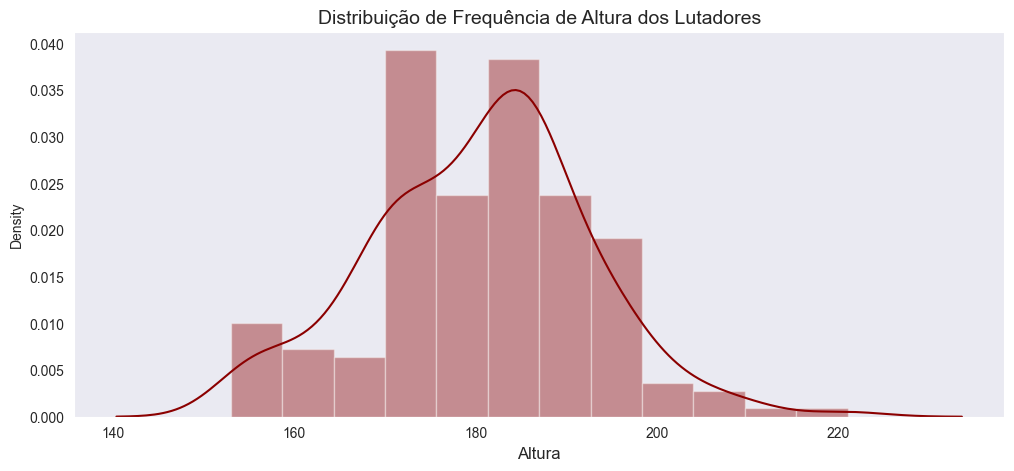

In [17]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) # Ignorar UserWarning

sns.set_style('dark')
ax = sns.distplot(wwe_lutadores.query('HEIGHT > 0').HEIGHT, color='darkred') #extrair apenas valores de peso acima de 0
ax.figure.set_size_inches(12,5)
ax.set_title('Distribuição de Frequência de Altura dos Lutadores', fontsize=14)
ax.set_xlabel('Altura', fontsize = 12)
ax

## Medidas de Tendência Central

In [18]:
media_peso = wwe_lutadores.WEIGHT.mean()
print(f'Média de Peso: {media_peso}')

media_altura = wwe_lutadores.HEIGHT.mean()
print(f'Média de Altura: {media_altura}')

Média de Peso: 89.3
Média de Altura: 174.135


In [19]:
mediana_peso = wwe_lutadores.WEIGHT.median()
print(f'Mediana de Peso: {mediana_peso}')

mediana_altura = wwe_lutadores.HEIGHT.median()
print(f'Mediana de Altura: {mediana_altura}')

Mediana de Peso: 95.5
Mediana de Altura: 180.0


In [20]:
moda_peso = wwe_lutadores.WEIGHT.mode()
print(f'Moda de Peso:\n{moda_peso}\n')

moda_altura = wwe_lutadores.HEIGHT.mode()
print(f'Moda de Altura:\n{moda_altura}')

Moda de Peso:
0      0
1    100
Name: WEIGHT, dtype: int64

Moda de Altura:
0    185
Name: HEIGHT, dtype: int64


## Medidas Separatrizes

In [21]:
quartis_peso= wwe_lutadores.WEIGHT.quantile([0.25, 0.5, 0.75])

quartis_altura= wwe_lutadores.HEIGHT.quantile([0.25, 0.5, 0.75])

quartis = pd.DataFrame(
    {'Quartis de Peso': quartis_peso, 'Quartis de Altura':quartis_altura}
)
quartis

,Quartis de Peso,Quartis de Altura
0.25,68.0,170.0
0.50,95.5,180.0
0.75,110.0,188.0


In [22]:
decis_cal_peso = [i/10 for i in range(1,10)]
decis_peso = wwe_lutadores.WEIGHT.quantile(decis_cal_peso)

decis_cal_altura = [i/10 for i in range(1,10)]
decis_altura = wwe_lutadores.HEIGHT.quantile(decis_cal_altura)

decis = pd.DataFrame(
    {'Decis de Peso': decis_peso, 'Decis de Altura':decis_altura}
)
decis

,Decis de Peso,Decis de Altura
0.1,52.9,162.0
0.2,63.0,170.0
0.3,76.4,173.0
0.4,89.0,178.0
0.5,95.5,180.0
0.6,100.0,185.0
0.7,108.0,185.0
0.8,113.0,188.2
0.9,121.1,195.0


In [23]:
percentis_cal_peso = [i/100 for i in range(1,100)]
percentis_peso = wwe_lutadores.WEIGHT.quantile(percentis_cal_peso)

percentis_cal_altura = [i/100 for i in range(1,100)]
percentis_altura = wwe_lutadores.HEIGHT.quantile(percentis_cal_altura)

percentis = pd.DataFrame(
    {'Percentis de Peso': percentis_peso, 'Percentis de Altura':percentis_altura}
)
percentis

,Percentis de Peso,Percentis de Altura
0.01,0.00,0.00
0.02,0.00,0.00
0.03,0.00,0.00
0.04,0.00,153.96
0.05,0.00,155.00
...,...,...
0.95,132.05,198.00
0.96,134.08,201.00
0.97,141.18,203.00
0.98,150.10,204.08


## Medidas de Dispersão

In [24]:
weigth_heigth = wwe_lutadores[['SUPERSTARS','WEIGHT', 'HEIGHT']]
weigth_heigth

,SUPERSTARS,WEIGHT,HEIGHT
0,Undertaker,136,208
1,John Cena,114,185
2,Shawn Michaels,103,185
3,AJ Styles,99,180
4,Randy Orton,110,193
...,...,...,...
195,Josh Briggs,122,204
196,Duke Hudson,115,196
197,Charlie Dempsey,94,0
198,Julius Creed,104,190


Desvio e Valor absoluto em relação a média de cada valor

In [32]:
media_weigth = weigth_heigth['WEIGHT'].mean()
weigth_heigth['DESVIO_WEIGHT'] = weigth_heigth['WEIGHT'] - media_weigth #calcula o desvio em relação a media de cada valor 
weigth_heigth['|DESVIO_WEIGHT|'] = weigth_heigth['DESVIO_WEIGHT'].abs() #calcula o valor absoluto de cada valor , valor numérico sem considerar o sinal
media_heigth = weigth_heigth['HEIGHT'].mean()
weigth_heigth['DESVIO_HEIGHT'] = weigth_heigth['HEIGHT'] - media_heigth
weigth_heigth['|DESVIO_HEIGHT|'] = weigth_heigth['DESVIO_HEIGHT'].abs()
weigth_heigth

,SUPERSTARS,WEIGHT,HEIGHT,DESVIO_WEIGHT,|DESVIO_WEIGHT|,DESVIO_HEIGHT,|DESVIO_HEIGHT|
0,Undertaker,136,208,46.7,46.7,33.865,33.865
1,John Cena,114,185,24.7,24.7,10.865,10.865
2,Shawn Michaels,103,185,13.7,13.7,10.865,10.865
3,AJ Styles,99,180,9.7,9.7,5.865,5.865
4,Randy Orton,110,193,20.7,20.7,18.865,18.865
...,...,...,...,...,...,...,...
195,Josh Briggs,122,204,32.7,32.7,29.865,29.865
196,Duke Hudson,115,196,25.7,25.7,21.865,21.865
197,Charlie Dempsey,94,0,4.7,4.7,-174.135,174.135
198,Julius Creed,104,190,14.7,14.7,15.865,15.865


Desvio Padrão Total e Desvio Médio Absoluto Total

In [26]:
desvio_padrao_peso = weigth_heigth.WEIGHT.std() #calcular o desvio padrão total
print(f'Desvio Padrão de Peso:\n{desvio_padrao_peso}')

desvio_padrao_altura = weigth_heigth.HEIGHT.std()
print(f'Desvio Padrão de Peso:\n{desvio_padrao_altura}')

Desvio Padrão de Peso:
33.034472629505494
Desvio Padrão de Peso:
35.288285456398434


In [33]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

desvio_medio_asoluto_peso = weigth_heigth.WEIGHT.mad() #calcular o desvio medio absoluto total
print(f'Desvio Médio Absoluto de Peso:\n{desvio_medio_asoluto_peso}')

desvio_medio_asoluto_altura = weigth_heigth.HEIGHT.mad()
print(f'Desvio Médio Absoluto de Peso:\n{desvio_medio_asoluto_altura}')

Desvio Médio Absoluto de Peso:
25.313000000000002
Desvio Médio Absoluto de Peso:
16.777750000000005


## Distribuição de Frequência das variáveis 'NATIONALITY' e 'SUPERSTARS'

In [28]:
wwe_lutadores

,ID_SUPERSTARS,SUPERSTARS,WEIGHT,HEIGHT,NATIONALITY,BIRTHDAY
0,1,Undertaker,136,208,"Houston, Texas, USA",1965-03-24
1,2,John Cena,114,185,"West Newbury, Massachusetts, USA",1977-04-23
2,3,Shawn Michaels,103,185,"Chandler, Arizona, USA",1965-07-22
3,4,AJ Styles,99,180,"Jacksonville, North Carolina, USA",1977-06-02
4,5,Randy Orton,110,193,"Knoxville, Tennessee, USA",1980-04-01
...,...,...,...,...,...,...
195,196,Josh Briggs,122,204,"Bullhead City, Arizona, USA",1994-12-02
196,197,Duke Hudson,115,196,"Adelaide, South Australia, Australia",1989-06-29
197,198,Charlie Dempsey,94,0,"Blackpool, Lancashire, England, UK",0
198,199,Julius Creed,104,190,"Lexington, Ohio, USA",1994-10-03


Tabela de Frequência das variáveis Qualitativas

In [29]:
countrys = wwe_lutadores['NATIONALITY'].str.split(', ').str[-1] #divide cada string na coluna 'NATIONALITY' em partes com base na vírgula

freq = pd.DataFrame({'Country':countrys,
                   'Frquência':wwe_lutadores.SUPERSTARS})
freq_soma = freq.groupby('Country').size().reset_index(name='Frequência') #é usado para contar a quantidade de superstars em cada país
freq_soma.query('Frequência > 1') #captura os países com mais de 1 lutador 


,Country,Frequência
0,Australia,6
1,Canada,13
3,Deutschland,2
6,Ireland,5
9,Japan,7
10,Mexiko,5
15,Spanien,2
16,UK,25
17,USA,125


Tabela de Porcentagem (%) das vaiáveis Qualitativas

In [30]:
perc = pd.crosstab(countrys,
                    wwe_lutadores.SUPERSTARS,
                    normalize = True) * 100
perc_soma = perc.sum(axis=1).reset_index(name='Porcentagem (%)')
perc_soma.query('`Porcentagem (%)` > 0.5')

,NATIONALITY,Porcentagem (%)
0,Australia,3.0
1,Canada,6.5
3,Deutschland,1.0
6,Ireland,2.5
9,Japan,3.5
10,Mexiko,2.5
15,Spanien,1.0
16,UK,12.5
17,USA,62.5


Histograma de Distribuição de Frequência de Superstars por Países

<AxesSubplot: title={'center': 'Distribuição de Frequência de Superstars por Países'}, xlabel='Nacionalidade', ylabel='Frequência'>

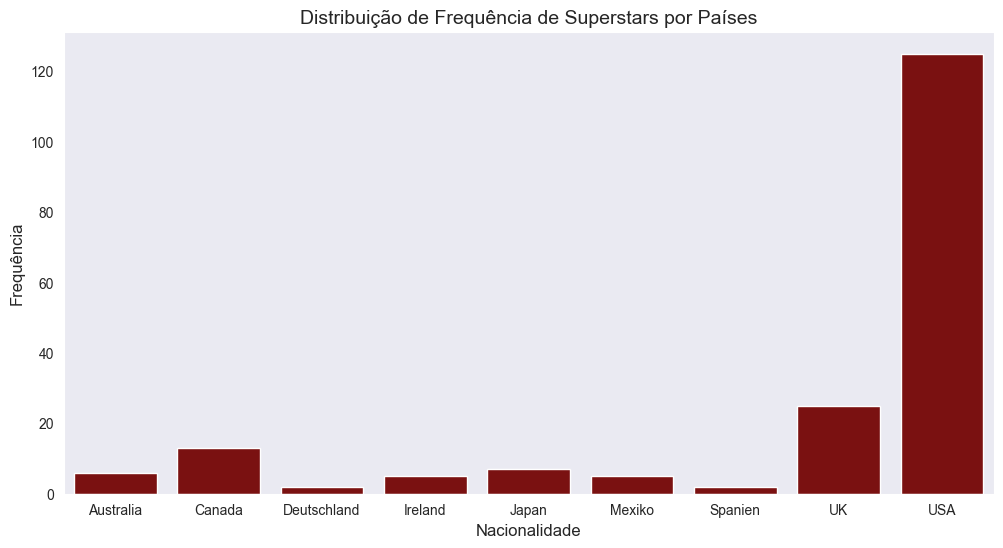

In [31]:
sns.set_style('dark')
ax = sns.barplot(data = freq_soma.query('Frequência > 1'), x ='Country', y='Frequência', color ='darkred')
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequência de Superstars por Países', fontsize= 14)
ax.set_xlabel('Nacionalidade', fontsize = 12)
ax.set_ylabel('Frequência', fontsize=12)
ax